# WeatherPy

In [1]:
# pip install citipy

In [2]:
# declarations
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime
from api_keys import weather_api_key
from citipy import citipy
import json

In [3]:
# initializations
output_data_folder = "output_data/"
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)
lat_lngs = []
cities = []

# random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

## Generate Cities List

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"{len(cities)} cities") 

622 cities


### Perform API Calls

In [5]:
# call openweather api for cities
api_calls = 0
api_limit_calls_minute = 60
api_limit_timeperiod_seconds = 60
api_seconds_buffer = 5
api_set = 1
base_url = "https://api.openweathermap.org/data/2.5/"
end_point = base_url + "weather"

params = {
    "q": "",
    "units": "imperial",
    "lang": "en",
    "mode": "json",
    "appid": weather_api_key
}

settime_start = time.time()
settime_cut = settime_start + api_limit_timeperiod_seconds

for city in cities:
    
    # have we exceeded 60 calls
    if api_calls >= api_limit_calls_minute:
    
        # wait for timeperiod to conclude
        if settime_cut - time.time() > 0:
            time.sleep(int(settime_cut - time.time()) + api_seconds_buffer)
                   
        # reset counters
        api_calls = 0
        api_set = api_set + 1
        settime_start = time.time()
        settime_cut = settime_start + api_limit_timeperiod_seconds
                   
    # api call
    params['q'] = city
    response = requests.get(end_point, params=params)
    result = response.json()
    cod = result["cod"]
    
    if cod == 200:
        lat = result["coord"]["lat"]
        lon = result["coord"]["lon"]
        max_temp = result["main"]["temp_max"]
        humidity = result["main"]["humidity"]
        cloudiness = result["clouds"]["all"]
        speed = result["wind"]["speed"]
        country = result["sys"]["country"]
        date = result["dt"]
    
    api_calls = api_calls + 1
    
    # first call
    if api_calls == 1 and api_set == 1:
        
        # build dataframe
        WeatherDF = pd.DataFrame(columns=[
            "City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
        
        # log header 
        print(f"Beginning Data Retrieval")
        print(f"-----------------------------")
        
    if cod == 200:
        # log city
        print(f"Processing Record {api_calls} of Set {api_set} | {city}")
        
        # add city to dataframe
        WeatherDF.loc[len(WeatherDF.index)] = [city, lat, lon, max_temp, humidity, cloudiness, speed, country, date] 
        
    elif (cod == '404'):
        # city not found
        print(f"City not found ({city}).  Skipping...")
    else:
        # unexpected error
        print(f"{result}")
        break

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | lagoa
Processing Record 4 of Set 1 | valleyview
Processing Record 5 of Set 1 | ixtapa
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | channel-port aux basques
Processing Record 8 of Set 1 | nuuk
Processing Record 9 of Set 1 | sao jose da coroa grande
Processing Record 10 of Set 1 | nome
City not found (belushya guba).  Skipping...
City not found (saleaula).  Skipping...
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | dunedin
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | yulara
City not found (mys shmidta).  Skipping...
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | surab
Processing Record 23 of Set 1 | tautira

Processing Record 17 of Set 4 | hilo
Processing Record 18 of Set 4 | fort frances
Processing Record 19 of Set 4 | iquique
Processing Record 20 of Set 4 | akhtubinsk
City not found (tubruq).  Skipping...
Processing Record 22 of Set 4 | cody
Processing Record 23 of Set 4 | ati
Processing Record 24 of Set 4 | fairbanks
Processing Record 25 of Set 4 | hays
Processing Record 26 of Set 4 | souillac
Processing Record 27 of Set 4 | codajas
Processing Record 28 of Set 4 | college
Processing Record 29 of Set 4 | hornepayne
Processing Record 30 of Set 4 | lokosovo
Processing Record 31 of Set 4 | zhangzhou
Processing Record 32 of Set 4 | krutikha
Processing Record 33 of Set 4 | khash
City not found (grand river south east).  Skipping...
Processing Record 35 of Set 4 | kurikka
Processing Record 36 of Set 4 | mehamn
Processing Record 37 of Set 4 | pimentel
Processing Record 38 of Set 4 | zyryanka
Processing Record 39 of Set 4 | niles
Processing Record 40 of Set 4 | marsabit
Processing Record 41 of S

Processing Record 37 of Set 7 | manggar
Processing Record 38 of Set 7 | tessalit
City not found (ust-kamchatsk).  Skipping...
Processing Record 40 of Set 7 | ariquemes
Processing Record 41 of Set 7 | vallenar
City not found (aflu).  Skipping...
Processing Record 43 of Set 7 | santa cruz
Processing Record 44 of Set 7 | palmer
Processing Record 45 of Set 7 | imeni vorovskogo
Processing Record 46 of Set 7 | taylor
Processing Record 47 of Set 7 | conceicao da barra
Processing Record 48 of Set 7 | petropavlovsk-kamchatskiy
Processing Record 49 of Set 7 | tadine
Processing Record 50 of Set 7 | morgan city
Processing Record 51 of Set 7 | le vauclin
Processing Record 52 of Set 7 | nosy varika
Processing Record 53 of Set 7 | bacolod
City not found (toliary).  Skipping...
Processing Record 55 of Set 7 | fuerte olimpo
City not found (saryshagan).  Skipping...
Processing Record 57 of Set 7 | sioux lookout
Processing Record 58 of Set 7 | sol-iletsk
Processing Record 59 of Set 7 | gobabis
Processing

Processing Record 55 of Set 10 | mwense
Processing Record 56 of Set 10 | sao gabriel da cachoeira
Processing Record 57 of Set 10 | kita
Processing Record 58 of Set 10 | ust-tsilma
Processing Record 59 of Set 10 | nieuw amsterdam
City not found (sentyabrskiy).  Skipping...
Processing Record 1 of Set 11 | palm coast
Processing Record 2 of Set 11 | xining
Processing Record 3 of Set 11 | teguise
Processing Record 4 of Set 11 | ponta do sol
Processing Record 5 of Set 11 | lukow
Processing Record 6 of Set 11 | arraias
Processing Record 7 of Set 11 | bisho
Processing Record 8 of Set 11 | ures
Processing Record 9 of Set 11 | ostrovnoy
Processing Record 10 of Set 11 | yar-sale
Processing Record 11 of Set 11 | husavik
Processing Record 12 of Set 11 | muroto
Processing Record 13 of Set 11 | kamenka
Processing Record 14 of Set 11 | fort nelson
Processing Record 15 of Set 11 | tsirguliina
Processing Record 16 of Set 11 | athmallik
Processing Record 17 of Set 11 | kavaratti
Processing Record 18 of S

### Convert to DataFrame

In [6]:
# Export the city data into a csv.
WeatherDF.to_csv(output_data_file) 

In [7]:
WeatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,31.66,74,20,8.05,AR,1658826655
1,albany,42.6001,-73.9662,59.52,87,0,4.59,US,1658826655
2,lagoa,39.0500,-27.9833,73.08,89,1,11.01,PT,1658826656
3,valleyview,55.0667,-117.2859,54.68,86,24,2.59,CA,1658826656
4,ixtapa,20.7000,-105.2000,78.22,94,20,0.00,MX,1658826657


In [8]:
WeatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,21.979530,14.242098,70.312984,70.075044,57.757417,7.848569,1.658827e+09
std,34.111817,91.715263,14.236824,21.766874,38.378390,5.342762,2.083238e+02
min,-54.800000,-179.166700,17.650000,6.000000,0.000000,0.000000,1.658826e+09
25%,-6.692200,-65.102300,59.740000,57.000000,20.000000,4.000000,1.658827e+09
50%,28.017000,18.133300,72.230000,76.000000,73.000000,6.670000,1.658827e+09
75%,51.466700,94.500000,80.650000,88.000000,98.000000,10.780000,1.658827e+09
max,78.218600,179.316700,113.310000,100.000000,100.000000,32.210000,1.658827e+09


## Inspect the data and remove the cities where the humidity > 100%

In [9]:
humid_city_count = len(WeatherDF.loc[WeatherDF["Humidity"] > 100])

# Skip this step if there are no cities that have humidity > 100%. 
if humid_city_count > 0:
    WeatherDF = WeatherDF.loc[WeatherDF["Humidity"] <= 100]

WeatherDF.describe()    

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,21.979530,14.242098,70.312984,70.075044,57.757417,7.848569,1.658827e+09
std,34.111817,91.715263,14.236824,21.766874,38.378390,5.342762,2.083238e+02
min,-54.800000,-179.166700,17.650000,6.000000,0.000000,0.000000,1.658826e+09
25%,-6.692200,-65.102300,59.740000,57.000000,20.000000,4.000000,1.658827e+09
50%,28.017000,18.133300,72.230000,76.000000,73.000000,6.670000,1.658827e+09
75%,51.466700,94.500000,80.650000,88.000000,98.000000,10.780000,1.658827e+09
max,78.218600,179.316700,113.310000,100.000000,100.000000,32.210000,1.658827e+09


## Plotting the Data

## Latitude vs. Temperature Plot

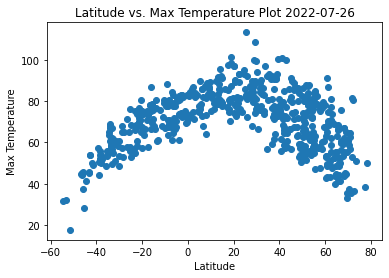

In [10]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Max Temp"])
plt.title("Latitude vs. Max Temperature Plot " + str(datetime.today().date()))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig(output_data_folder + "latitude_temperature.png")
plt.show()

In general, the maximum temperatures of cities is observed increasing as cities approach the equator.  On this date, the inflextion point appears between latitude 20 and 40 where some maximum temperatures measured over 100F.

## Latitude vs. Humidity Plot

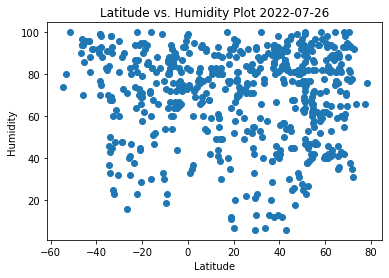

In [11]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Humidity"])
plt.title("Latitude vs. Humidity Plot " + str(datetime.today().date()))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig(output_data_folder + "latitude_humidity.png")
plt.show()

On this date, there does not appear to be an observable relationship between city's latitude and the percentage humidity.

## Latitude vs. Cloudiness Plot

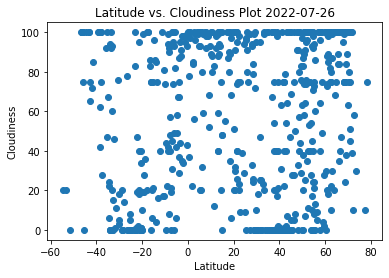

In [12]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Cloudiness"])
plt.title("Latitude vs. Cloudiness Plot " + str(datetime.today().date()))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig(output_data_folder + "latitude_cloudiness.png")
plt.show()

On this date, there does not appear to be an observable relationship between city's latitude and the percentage cloudiness.

## Latitude vs. Wind Speed Plot

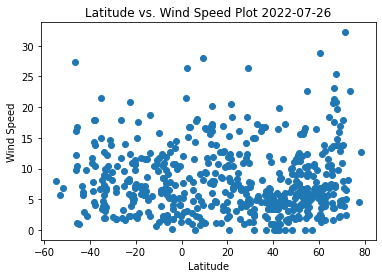

In [13]:
plt.scatter(WeatherDF["Lat"], WeatherDF["Wind Speed"])
plt.title("Latitude vs. Wind Speed Plot " + str(datetime.today().date()))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig(output_data_folder + "latitude_windspeed.png")
plt.show()

On this date, there does not appear to be an observable relationship between city's latitude and the maximum wind speed.

## Linear Regression

In [14]:
# northern hemi data
HemiNorthDF = WeatherDF.loc[WeatherDF["Lat"] >= 0]

In [15]:
# southern hemi data
HemiSouthDF = WeatherDF.loc[WeatherDF["Lat"]<= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

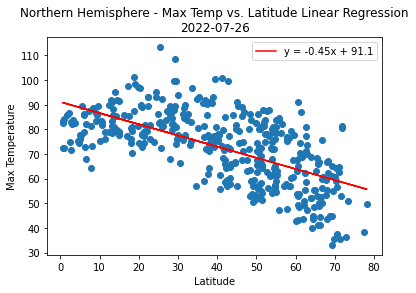

In [16]:
plot_title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression\n" + str(datetime.today().date())
x_label = "Latitude"
y_label = "Max Temperature"
x_values = HemiNorthDF["Lat"]
y_values = HemiNorthDF["Max Temp"]
imagefile = "reg_temperature_latitude_hemi_n.png"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, c="r", label=line_eq)
plt.title(plot_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(loc='best')
plt.savefig(output_data_folder + imagefile)
plt.show()

In [17]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.62


The plot above shows there is a negative correlation between temperature and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

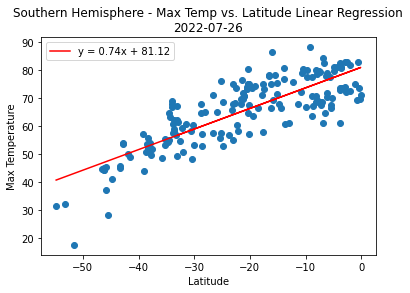

In [18]:
plot_title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression\n" + str(datetime.today().date())
x_label = "Latitude"
y_label = "Max Temperature"
x_values = HemiSouthDF["Lat"]
y_values = HemiSouthDF["Max Temp"]
imagefile = "reg_temperature_latitude_hemi_s.png"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, c="r", label=line_eq)
plt.title(plot_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(loc='best')
plt.savefig(output_data_folder + imagefile)
plt.show()

In [19]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.82


The plot above shows there is a positive correlation between temperature and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

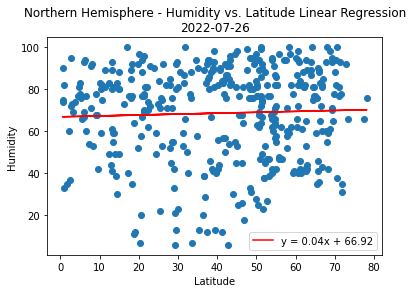

In [20]:
plot_title = "Northern Hemisphere - Humidity vs. Latitude Linear Regression\n" + str(datetime.today().date())
x_label = "Latitude"
y_label = "Humidity"
x_values = HemiNorthDF["Lat"]
y_values = HemiNorthDF["Humidity"]
imagefile = "reg_humidity_latitude_hemi_n.png"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, c="r", label=line_eq)
plt.title(plot_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(loc='best')
plt.savefig(output_data_folder + imagefile)
plt.show()

In [21]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.04


The plot above shows there is a negligible correlation between humidity and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

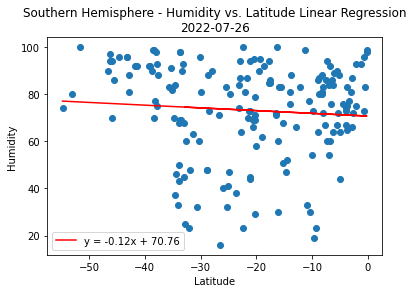

In [22]:
plot_title = "Southern Hemisphere - Humidity vs. Latitude Linear Regression\n" + str(datetime.today().date())
x_label = "Latitude"
y_label = "Humidity"
x_values = HemiSouthDF["Lat"]
y_values = HemiSouthDF["Humidity"]
imagefile = "reg_humidity_latitude_hemi_s.png"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, c="r", label=line_eq)
plt.title(plot_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(loc='best')
plt.savefig(output_data_folder + imagefile)
plt.show()

In [23]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.08


The plot above shows there is a negligible correlation between humidity and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

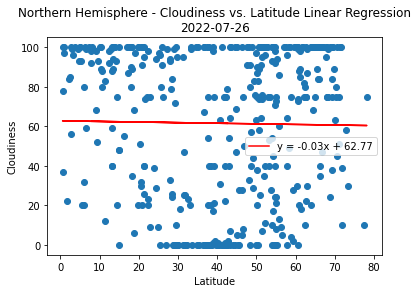

In [24]:
plot_title = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression\n" + str(datetime.today().date())
x_label = "Latitude"
y_label = "Cloudiness"
x_values = HemiNorthDF["Lat"]
y_values = HemiNorthDF["Cloudiness"]
imagefile = "reg_cloudiness_latitude_hemi_n.png"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, c="r", label=line_eq)
plt.title(plot_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(loc='best')
plt.savefig(output_data_folder + imagefile)
plt.show()

In [25]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.02


The plot above shows there is a negligible correlation between cloudiness and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

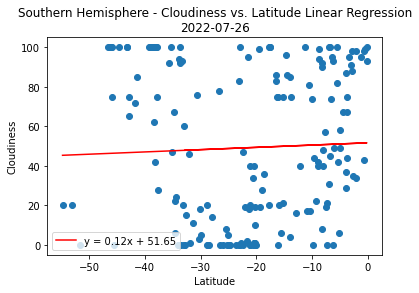

In [26]:
plot_title = "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression\n" + str(datetime.today().date())
x_label = "Latitude"
y_label = "Cloudiness"
x_values = HemiSouthDF["Lat"]
y_values = HemiSouthDF["Cloudiness"]
imagefile = "reg_cloudiness_latitude_hemi_s.png"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, c="r", label=line_eq)
plt.title(plot_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(loc='best')
plt.savefig(output_data_folder + imagefile)
plt.show()

In [27]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.04


The plot above shows there is a negligible correlation between cloudiness and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

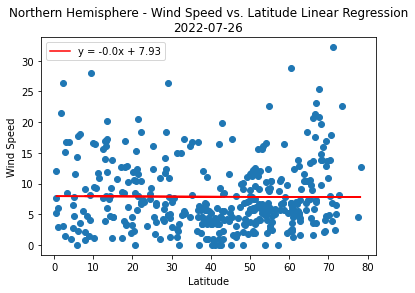

In [28]:
plot_title = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression\n" + str(datetime.today().date())
x_label = "Latitude"
y_label = "Wind Speed"
x_values = HemiNorthDF["Lat"]
y_values = HemiNorthDF["Wind Speed"]
imagefile = "reg_windspeed_latitude_hemi_n.png"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, c="r", label=line_eq)
plt.title(plot_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(loc='best')
plt.savefig(output_data_folder + imagefile)
plt.show()

In [29]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.01


The plot above shows there is negligible correlation between wind speed and latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

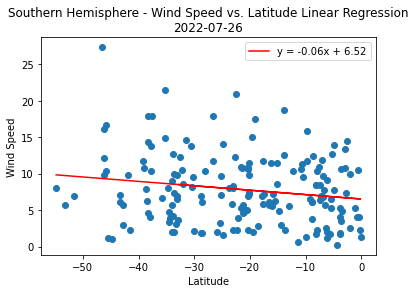

In [30]:
plot_title = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression\n" + str(datetime.today().date())
x_label = "Latitude"
y_label = "Wind Speed"
x_values = HemiSouthDF["Lat"]
y_values = HemiSouthDF["Wind Speed"]
imagefile = "reg_windspeed_latitude_hemi_s.png"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, c="r", label=line_eq)
plt.title(plot_title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(loc='best')
plt.savefig(output_data_folder + imagefile)
plt.show()

In [31]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.18


The plot above shows there is a negative correlation between wind speed and latitude in the Southern Hemisphere.